In [1]:
# http://www.physics.usyd.edu.au/teach_res/mp/mscripts/
# ns_izh002.m
import collections
from collections import OrderedDict
import numpy as np

# Fast spiking cannot be reproduced as it requires modifications to the standard Izhi equation,
# which are expressed in this mod file.
# https://github.com/OpenSourceBrain/IzhikevichModel/blob/master/NEURON/izhi2007b.mod


reduced2007 = collections.OrderedDict([
  #              C    k     vr  vt vpeak   a      b   c    d  celltype
  ('RS',        (100, 0.7,  -60, -40, 35, 0.03,   -2, -50,  100,  1)),
  ('IB',        (150, 1.2,  -75, -45, 50, 0.01,   5, -56,  130,   2)),
  ('LTS',       (100, 1.0,  -56, -42, 40, 0.03,   8, -53,   20,   4)),
  ('TC',        (200, 1.6,  -60, -50, 35, 0.01,  15, -60,   10,   6)),
  ('TC_burst',  (200, 1.6,  -60, -50, 35, 0.01,  15, -60,   10,   6))])


type2007 = collections.OrderedDict([
  #              C    k     vr  vt vpeak   a      b   c    d  celltype
  ('RS',        (100, 0.7,  -60, -40, 35, 0.03,   -2, -50,  100,  1)),
  ('IB',        (150, 1.2,  -75, -45, 50, 0.01,   5, -56,  130,   2)),
  ('LTS',       (100, 1.0,  -56, -42, 40, 0.03,   8, -53,   20,   4)),
  ('TC',        (200, 1.6,  -60, -50, 35, 0.01,  15, -60,   10,   6)),
  ('TC_burst',  (200, 1.6,  -60, -50, 35, 0.01,  15, -60,   10,   6)),
  ('RTN',       (40,  0.25, -65, -45,  0, 0.015, 10, -55,   50,   7)),
  ('RTN_burst', (40,  0.25, -65, -45,  0, 0.015, 10, -55,   50,   7)),
  ('CH',        (50,  1.5,  -60, -40, 25, 0.03,   1, -40,  150,   3)),
  ('FS',        (20,  1.0,  -55, -40, 25, 0.2,   -2, -45,  -55,   5))])

reduced_dict = OrderedDict([(k,[]) for k in ['C','k','vr','vt','vPeak','a','b','c','d']])

#OrderedDict
for i,k in enumerate(reduced_dict.keys()):
    for v in type2007.values():
        reduced_dict[k].append(v[i])

explore_param = {k:(np.min(v),np.max(v)) for k,v in reduced_dict.items()}
param_ranges = OrderedDict(explore_param)


RS = {}
IB = {}
TC = {}
CH = {}
RTN_burst = {}
cells = OrderedDict([(k,[]) for k in ['RS','IB','CH','LTS','FS','TC','TC_burst','RTN','RTN_busrt']])
reduced_cells = OrderedDict([(k,[]) for k in ['RS','IB','LTS','TC','TC_burst']])

for index,key in enumerate(reduced_cells.keys()):
    reduced_cells[key] = {}
    for k,v in reduced_dict.items():
        reduced_cells[key][k] = v[index]

print(reduced_cells)
cells = reduced_cells

OrderedDict([('RS', {'d': 100, 'a': 0.03, 'b': -2, 'k': 0.7, 'c': -50, 'C': 100, 'vPeak': 35, 'vr': -60, 'vt': -40}), ('IB', {'d': 130, 'a': 0.01, 'b': 5, 'k': 1.2, 'c': -56, 'C': 150, 'vPeak': 50, 'vr': -75, 'vt': -45}), ('LTS', {'d': 20, 'a': 0.03, 'b': 8, 'k': 1.0, 'c': -53, 'C': 100, 'vPeak': 40, 'vr': -56, 'vt': -42}), ('TC', {'d': 10, 'a': 0.01, 'b': 15, 'k': 1.6, 'c': -60, 'C': 200, 'vPeak': 35, 'vr': -60, 'vt': -50}), ('TC_burst', {'d': 10, 'a': 0.01, 'b': 15, 'k': 1.6, 'c': -60, 'C': 200, 'vPeak': 35, 'vr': -60, 'vt': -50})])


In [2]:
model = None
from neuronunit.models.reduced import ReducedModel
from neuronunit.optimization import get_neab

from neuronunit.optimization.model_parameters import model_params, path_params
LEMS_MODEL_PATH = path_params['model_path']

model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
model.set_attrs(cells['TC'])



In [3]:

tests_,all_tests, observation,suite = get_neab.get_tests()

rheobase = all_tests[0].generate_prediction(model)
print(rheobase)

{'value': array(75.53061224489795) * pA}


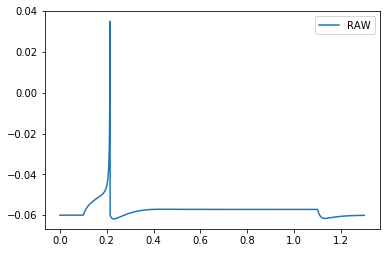

In [4]:


import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuronunit.models.reduced import ReducedModel
from neuronunit.optimization.model_parameters import model_params, path_params
LEMS_MODEL_PATH = path_params['model_path']
import neuronunit.optimization as opt
import quantities as pq

from neuronunit.optimization.data_transport_container import DataTC
model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
model.set_attrs(cells['TC'])

iparams = {}
iparams['injected_square_current'] = {}
iparams['injected_square_current']['amplitude'] =75.36800000000001*pq.pA
#['amplitude']  = dtc.vtest[k]['injected_square_current']['amplitude']
DELAY = 100.0*pq.ms
DURATION = 1000.0*pq.ms
iparams['injected_square_current']['delay'] = DELAY
iparams['injected_square_current']['duration'] = int(DURATION)

model.inject_square_current(iparams)

plt.plot(model.get_membrane_potential().times,model.get_membrane_potential(),label='RAW')
plt.legend()
plt.show()


In [5]:

cnt = 0
scores = []
tests_,all_tests, observation,suite = opt.get_neab.get_tests()


In [6]:



def format_iparams(all_tests,rheobase):

    for t in all_tests[1:5]:
        DURATION = 500.0*pq.ms
        DELAY = 200.0*pq.ms

        obs = t.observation
        t.params = {}
        t.params['injected_square_current'] = {}
        t.params['injected_square_current']['delay']= DELAY
        t.params['injected_square_current']['duration'] = DURATION
        t.params['injected_square_current']['amplitude'] = -10*pq.pA
        
        
    for t in all_tests[-3::]:    
        t.params = {}
        DURATION = 1000.0*pq.ms
        DELAY = 100.0*pq.ms

        t.params['injected_square_current'] = {}
        t.params['injected_square_current']['delay']= DELAY
        t.params['injected_square_current']['duration'] = DURATION
        t.params['injected_square_current']['amplitude'] = rheobase['value']
    
    all_tests[0].params = all_tests[-1].params
    
    return all_tests

pt = format_iparams(all_tests,rheobase)
print([t.params['injected_square_current']['amplitude'] for t in pt[-3::] ])
print([t.params['injected_square_current']['amplitude'] for t in pt[0:5] ])



[array(75.53061224489795) * pA, array(75.53061224489795) * pA, array(75.53061224489795) * pA]
[array(75.53061224489795) * pA, array(-10.0) * pA, array(-10.0) * pA, array(-10.0) * pA, array(-10.0) * pA]


##
# * Get predictions from models.
## * Fake NeuroElectro Observations
## * Do roundtrip testing
##

In [7]:
predictions = []
import dask.bag as db
# The rheobase has been obtained seperately and cannot be db mapped.
# Nested DB mappings dont work.
ptbag = db.from_sequence(pt[1::])

def obtain_predictions(t):    
    model = None
    model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
    model.set_attrs(cells['TC'])
    return t.generate_prediction(model)
predictions = list(ptbag.map(obtain_predictions).compute())
predictions.insert(0,rheobase)
print(predictions)    


injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
[{'value': array(75.53061224489795) * pA}, {'value': array(31739282.99824782) * kg*m**2/(s**3*A**2)}, {'value': array(0.0034631849083750876) * s}, {'value': array(1.0911352057216523e-10) * s**4*A**2/(kg*m**2)}, {'std': array(0.00019622743842309925) * V, 'mean': array(-0.060317405613048956) * V}, {'std': array(0.0) * s, 'n': 1, 'mean': array(0.0006500000000000001) * s}, {'std': array(0.0) * V, 'n': 1, 'mean': array(0.056127191359642024) * V}, {'std': array(0.0) * V, 'n': 1, 'mean': array(-0.02112719135964202) * V}]


In [8]:
# having both means and values in dictionary makes it very irritating to iterate over.
# It's more harmless to demote means to values, than to elevate values to means.
# Simply swap key names: means, for values.
for p in predictions:
    if 'mean' in p.keys():
        p['value'] = p.pop('mean')
print(predictions)


[{'value': array(75.53061224489795) * pA}, {'value': array(31739282.99824782) * kg*m**2/(s**3*A**2)}, {'value': array(0.0034631849083750876) * s}, {'value': array(1.0911352057216523e-10) * s**4*A**2/(kg*m**2)}, {'std': array(0.00019622743842309925) * V, 'value': array(-0.060317405613048956) * V}, {'std': array(0.0) * s, 'n': 1, 'value': array(0.0006500000000000001) * s}, {'std': array(0.0) * V, 'n': 1, 'value': array(0.056127191359642024) * V}, {'std': array(0.0) * V, 'n': 1, 'value': array(-0.02112719135964202) * V}]


In [9]:
# make some new tests based on internally generated data 
# as opposed to experimental data.


TC_tests = copy.copy(all_tests)
for ind,t in enumerate(TC_tests):
    if 'mean' in t.observation.keys():
        t.observation['value'] = t.observation.pop('mean')
    pred =  predictions[ind]['value']
    try:
        pred = pred.rescale(t.units)
        t.observation['value'] = pred
    except:        
        t.observation['value'] = pred
    t.observation['mean'] = t.observation['value']
        
    print(t.observation['value'])
    
pickle.dump(TC_tests,open('thalamo_cortical_tests.p','wb'))    
    




75.53061224489795 pA
31.73928299824782 Mohm
3.4631849083750876 ms
1.0911352057216523e-10 s**4*A**2/(kg*m**2)
-60.317405613048955 mV
0.6500000000000001 ms
56.127191359642026 mV
-21.127191359642023 mV


In [10]:
from neuronunit.optimization import optimization_management as om
free_params = ['a','b','vr']#,'k','vt'] # this can only be odd numbers.

#
hc = {}
for k,v in cells['TC'].items():
    if k not in free_params:
        hc[k] = v
print(hc)
import pickle
TC_tests = pickle.load(open('thalamo_cortical_tests.p','rb'))    
ga_out, DO = om.run_ga(explore_param,5,TC_tests,free_params=free_params,hc = hc)

{'d': 10, 'k': 1.6, 'c': -60, 'C': 200, 'vPeak': 35, 'vt': -50}
not even to test runner getting


/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[array(227.1326530612245) * pA, array(6.928571428571429) * pA, array(319.9708454810496) * pA, array(32.33673469387755) * pA, array(226.28571428571428) * pA, array(6.081632653061225) * pA, array(473.7609329446064) * pA, array(83.15306122448979) * pA]
injected current seen:  {'duration': array(1000.0) * ms, 'delay': array(100.0) * ms, 'amplitude': array(227.1326530612245) * pA}
injected current seen:  {'duration': array(1000.0) * ms, 'delay': array(100.0) * ms, 'amplitude': array(6.928571428571429) * pA}
injected current seen:  {'duration': array(1000.0) * ms, 'delay': array(100.0) * ms, 'amplitude': array(32.33673469387755) * pA}
injected current seen:  {'duration': array(1000.0) * ms, 'delay': array(100.0) * ms, 'amplitude': array(319.9708454810496) * pA}
input resistance score: Z = 3.30
input resistance score: Z = 0.47
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
injected current seen:  {'duration': array(500.0) * 

/home/jovyan/neuronunit/neuronunit/tests/passive.py:83: RuntimeWarning: overflow encountered in exp
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c


injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}


/home/jovyan/neuronunit/neuronunit/tests/passive.py:83: RuntimeWarning: overflow encountered in multiply
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c


injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}


INFO:__main__:gen	nevals	avg    	std     	min    	max    
1  	8     	3.89399	0.918618	2.38982	5.21792
2  	6     	3.82178	1.18981 	1.16878	5.21792


[<neuronunit.optimization.data_transport_container.DataTC object at 0x7fee3455f128>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7fee345d09b0>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7fee345d00f0>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7fee3718ee10>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7fee37192a58>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7fee344878d0>]
tests, completed, now gene computations
[[0.01, -2.0, -75.0], [0.01, -2, -55], [0.01, 15.0, -72.162359315819316], [0.019842752401015011, 15, -57.837640684180677], [0.20000000000000001, -2, -74.652924436008334], [0.20000000000000001, -2, -55], [0.20000000000000001, 15, -56.279875816303409], [0.20000000000000001, 13.919119365130545, -73.720124183696583]]
not even to test runner getting
[array(93.31632653061224) * pA, array(397.23032069970844) * pA, array(416.1807580174927) * pA]
injected curr

/home/jovyan/neuronunit/neuronunit/tests/passive.py:83: RuntimeWarning: overflow encountered in exp
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c
/home/jovyan/neuronunit/neuronunit/tests/passive.py:83: RuntimeWarning: overflow encountered in multiply
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c


injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}


INFO:__main__:3  	3     	3.44631	0.539488	2.54048	3.93815


[<neuronunit.optimization.data_transport_container.DataTC object at 0x7fee3455f438>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7fee3806c4a8>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7fee3718ecf8>]
tests, completed, now gene computations
not even to test runner getting
[array(93.31632653061224) * pA, array(93.31632653061224) * pA, array(83.15306122448979) * pA, array(101.78571428571428) * pA]
injected current seen:  {'duration': array(1000.0) * ms, 'delay': array(100.0) * ms, 'amplitude': array(93.31632653061224) * pA}
injected current seen:  {'duration': array(1000.0) * ms, 'delay': array(100.0) * ms, 'amplitude': array(93.31632653061224) * pA}
injected current seen:  {'duration': array(1000.0) * ms, 'delay': array(100.0) * ms, 'amplitude': array(83.15306122448979) * pA}
injected current seen:  {'duration': array(1000.0) * ms, 'delay': array(100.0) * ms, 'amplitude': array(101.78571428571428) * pA}
input resistance score: Z = 0.65

INFO:__main__:4  	4     	2.52815	0.260893	2.24113	2.94118


[<neuronunit.optimization.data_transport_container.DataTC object at 0x7fee345d0c88>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7fee371886d8>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7fee3455f048>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7fee5685d048>]
tests, completed, now gene computations
[[0.17283487762003827, 13.821996424655216, -56.602532543393217], [0.20000000000000001, 13.821996424655216, -56.602532543393217], [0.20000000000000001, 15.0, -55.0], [0.20000000000000001, 13.002091326490282, -57.788628990542293]]
not even to test runner getting
[array(83.15306122448979) * pA, array(95.01020408163265) * pA, array(93.31632653061224) * pA, array(135.66326530612244) * pA]
injected current seen:  {'duration': array(1000.0) * ms, 'delay': array(100.0) * ms, 'amplitude': array(83.15306122448979) * pA}
injected current seen:  {'duration': array(1000.0) * ms, 'delay': array(100.0) * ms, 'amplitude': array(95.

INFO:__main__:5  	4     	2.47542	0.34641 	2.07671	3.03096


[<neuronunit.optimization.data_transport_container.DataTC object at 0x7fee3718e828>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7fee37197048>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7fee34473780>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7fee3716fa58>]
tests, completed, now gene computations
[[0.20000000000000001, 15.0, -55], [0.20000000000000001, 13.05819718288449, -57.193440475374892], [0.17283487762003827, 13.813518137336468, -56.602532543393217], [0.20000000000000001, 11.735821400014721, -61.046405670263503]]


{'a': 0.019842752401015011, 'b': 15, 'vr': -57.837640684180677}
{'d': 10, 'a': 0.01, 'b': 15, 'k': 1.6, 'c': -60, 'C': 200, 'vPeak': 35, 'vr': -60, 'vt': -50}


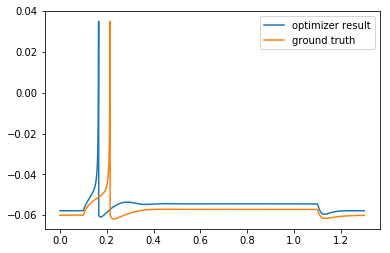

In [11]:
print(ga_out['dhof'][0].attrs)
print(cells['TC'])


model1 = None
model1 = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
model1.set_attrs(ga_out['dhof'][0].attrs)
model1.inject_square_current(iparams)

model2 = None
model2 = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
#vanilla = translate(mparams,m2m)
model2.set_attrs(cells['TC'])
model2.inject_square_current(iparams)


plt.plot(model1.get_membrane_potential().times,model1.get_membrane_potential(),label='optimizer result')
plt.plot(model2.get_membrane_potential().times,model2.get_membrane_potential(),label='ground truth')
plt.legend()

In [12]:
def hack_judge(test_and_models):
    (test, attrs) = test_and_models
    model = None
    obs = test.observation
    model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
    model.set_attrs(attrs)
    test.generate_prediction(model)
    pred = test.generate_prediction(model)
    score = test.compute_score(obs,pred)
    try:
        print(obs['value'],pred['value'])
    except:
        print(obs['mean'],pred['mean'])
        
    return score

scores = []
for i,t in enumerate(TC_tests):
    test_and_models = (t,cells['TC'])
    score = hack_judge(test_and_models)
    scores.append(score)
print(scores[0].sort_key)    
print(scores[0])    



75.53061224489795 pA 75.53061224489795 pA
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
input resistance score: Z = 0.00
31.73928299824782 Mohm 31739282.99824782 kg*m**2/(s**3*A**2)
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
3.4631849083750876 ms 0.0034631849083750876 s
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
1.0911352057216523e-10 s**4*A**2/(kg*m**2) 1.0911352057216523e-10 s**4*A**2/(kg*m**2)
-60.317405613048955 mV -0.0603174056

In [13]:

ga_out.keys()
ga_out['dhof'][0].scores


{'CapacitanceTest': 0.3941135778347633,
 'InjectedCurrentAPAmplitudeTest': 0.056286812623258964,
 'InjectedCurrentAPThresholdTest': 0.1301810981679412,
 'InjectedCurrentAPWidthTest': 0.07455112037761191,
 'InputResistanceTest': 0.12468893958387861,
 'RestingPotentialTest': 0.2550425415991806,
 'RheobaseTestP': 0.1269862366342951,
 'TimeConstantTest': 0.006927779205798235}

In [14]:
print([s.sort_key for s in scores])
print([s.score for s in scores])

score = hack_judge((TC_tests[-3],cells['TC']))
print(score)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 0.9999999999999996]
[0.0, 0.0, 0.0, 0.0, 0.0, -2.029026769368064e-16, 0.0, 6.317017647578838e-16]
0.6500000000000001 ms 0.0006500000000000001 s
Z = -0.00


In [15]:
scores = []
for t in TC_tests:
    test_and_models = (t,cells['RS'])
    score = hack_judge(test_and_models)
    scores.append(score)
print(scores[0].sort_key)    
print(scores[0])
print([s.sort_key for s in scores])


75.53061224489795 pA 51.81632653061225 pA
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
input resistance score: Z = 0.62
31.73928299824782 Mohm 79634016.52239381 kg*m**2/(s**3*A**2)
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
3.4631849083750876 ms 0.009810667396493434 s
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
1.0911352057216523e-10 s**4*A**2/(kg*m**2) 1.231969430266598e-10 s**4*A**2/(kg*m**2)
-60.317405613048955 mV -0.060753466276

In [16]:
import dask.bag as db
# The rheobase has been obtained seperately and cannot be db mapped.
# Nested DB mappings dont work.
from itertools import repeat
test_a_models = zip(TC_tests[1::],repeat(cells['RS']))
tc_bag = db.from_sequence(test_a_models)

scores = list(tc_bag.map(hack_judge).compute())
scores.insert(0,rheobase)
print(scores)    

injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
input resistance score: Z = 0.62
31.73928299824782 Mohm 79634016.52239381 kg*m**2/(s**3*A**2)
3.4631849083750876 ms 0.009810667396493434 s
injected current seen:  {'duration': array(500.0) * ms, 'delay': array(200.0) * ms, 'amplitude': array(-10.0) * pA}
-21.127191359642023 mV -0.018576602637434048 V
0.6500000000000001 ms 0.0007750000000000001 s
56.127191359642026 mV 0.05357660263743405 V
1.0911352057216523e-10 s**4*

In [17]:
score = TC_tests[0].judge(model,stop_on_error = False, deep_error = True)
print(score.prediction)
#print(model.get_spike_count())

{'value': array(75.53061224489795) * pA}


In [18]:
from neuronunit.optimization import optimization_management as opt
from neuronunit.models import ReducedModel

ImportError: cannot import name 'ReducedModel'